In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

# Create synthetic datas.

In [2]:
np.random.seed(1)
num_observations = 5000
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

In [3]:
x1

array([[-1.3031474 , -1.73572451],
       [ 0.87341113,  0.11470774],
       [ 0.0042021 , -1.62323152],
       ...,
       [ 0.50854377,  0.56013327],
       [-0.09895919, -0.81606716],
       [ 0.56701073, -0.44971683]])

In [4]:
x2

array([[ 1.03389364,  4.19523406],
       [ 1.62319626,  4.03590629],
       [ 1.1843514 ,  4.30410292],
       ...,
       [ 0.2955668 ,  2.62861775],
       [-0.58320577,  4.1198141 ],
       [ 0.20944235,  3.13901712]])

In [5]:
simulated_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

In [6]:
simulated_features , simulated_labels

(array([[-1.3031474 , -1.7357246 ],
        [ 0.8734111 ,  0.11470774],
        [ 0.0042021 , -1.6232315 ],
        ...,
        [ 0.2955668 ,  2.6286178 ],
        [-0.58320576,  4.119814  ],
        [ 0.20944235,  3.139017  ]], dtype=float32),
 array([0., 0., 0., ..., 1., 1., 1.]))

# Let's see how it looks in plot

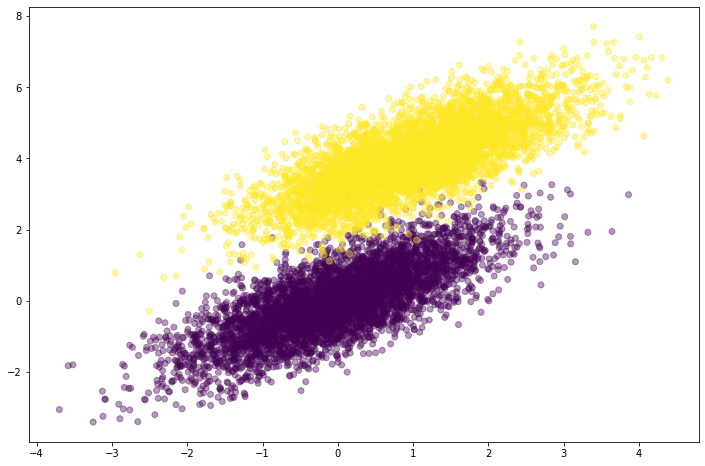

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_features[:, 0], simulated_features[:, 1],c = simulated_labels, alpha = .4)

# Create Sigmoid Funtion

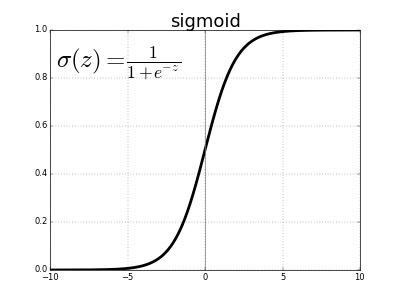

In [8]:
Image(filename='sigmoid.jpg')

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculating the Log-Likelihood

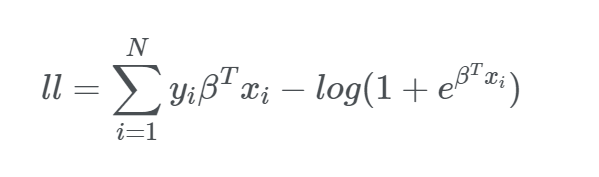

In [10]:
Image(filename='log.png')

In [11]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

# Calculating the Gradient

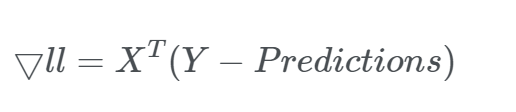

In [12]:
Image(filename='gradient.png')

# Building the Logistic Regression Function

In [13]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = (target - predictions)
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

# Run Model

In [14]:
weights = logistic_regression(simulated_features, simulated_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-4326.119422996867
-185.24907925815327
-181.96940060014416
-181.43820562128238
-181.32160609318643
-181.29295994515604
-181.2855561279125
-181.28359483893607
-181.28306881004409
-181.2829268281391
-181.28288837963572
-181.2828779501201
-181.2828751185149
-181.28287434938238
-181.28287414041728
-181.28287408363656
-181.28287406820704
-181.28287406401398
-181.28287406287444
-181.28287406256484
-181.28287406248072
-181.28287406245775
-181.28287406245155
-181.2828740624499
-181.2828740624494
-181.2828740624492
-181.28287406244928
-181.28287406244928
-181.28287406244934
-181.2828740624493


In [15]:
data_with_intercept = np.hstack((np.ones((simulated_features.shape[0], 1)),
                                 simulated_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.9929
